# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [4]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

NameError: name 'main' is not defined

In [3]:
df_courses = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/courses.csv')
df_students = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/students.csv', parse_dates=['birthday'])
df_course_cont = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/course_contents.csv')
df_progress = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/progresses.csv')
# прочитаем все необходимые данные
df_progr_phase = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/progress_phases.csv')

In [5]:
# объединим все данные
data = df_progress.merge(df_progr_phase, how='left', left_on='id', right_on='progress_id').merge(
    df_courses,  left_on='course_id', right_on='id').merge(df_course_cont, how='left', on=['course_id', 'module_number', 'lesson_number'])
# удалим все лишние столбцы
data = data.drop(columns=['id_x', 'id_y', 'Unnamed: 0'])
data.head()

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,3.0,done,2018-02-19 19:21:25.013391+00,2018-02-20 08:46:02.029132+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True
1,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,2.0,done,2018-02-19 19:21:25.002537+00,2018-02-20 08:46:02.022666+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Пишем ТЗ. Годные шаблоны,c75f28a2-02fe-47ce-929d-6db242111831,True,False
2,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,1.0,done,2018-02-19 19:21:24.985811+00,2018-02-20 08:46:02.007429+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Аналитика в digital-проектах,96c8b66c-6bce-4d02-908f-7577dc2b32b3,True,False
3,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,1.0,1.0,done,2018-02-06 21:47:41+00,2018-02-06 14:32:40+00,Руководитель digital-проектов,Business,Экологичный путь менеджера,Карта компетенций менеджера,023d96d8-63ac-4d6f-974f-a15add3cdb34,True,False
4,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,cc5799c97826d79ac3ede2791daac00e,4.0,3.0,fail,2018-03-17 13:50:55.262335+00,NaN,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True


In [6]:
data[data.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # кол-во данных совпало с проверочным

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
164816,768c2987a744c51ce64a5993a2a94eaf,dad6f6ffc086caa89e2f40c28a9c7490,6407c290505e790e92207a1dbc41a2cd,1.0,1.0,start,2018-06-20 14:25:13.010259+00,NaN,UX-дизайн,Design,Профессия дизайнера в эпоху цифровых перемен,Приветствие,86d0d49c-5590-4c0b-8fca-927191bb3fd5,True,False
187756,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,3.0,done,2018-06-19 15:08:14.103923+00,2018-06-19 15:39:53.661163+00,JavaScript с нуля,Development,Знакомство с языком,Инструменты разработчика,460c54ea-d899-44d3-8940-00302ff5f2e5,True,False
187757,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,1.0,done,2018-06-19 10:40:05.063485+00,2018-06-19 14:56:16.346353+00,JavaScript с нуля,Development,Знакомство с языком,Интро,0d4678b0-abfe-4132-9193-97f9b0f08d3a,True,False
187758,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,7.0,start,2018-06-19 18:40:00.576904+00,NaN,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True
187759,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,5.0,done,2018-06-19 18:10:52.316728+00,2018-06-19 18:35:38.720317+00,JavaScript с нуля,Development,Знакомство с языком,Синтаксис языка,fe10ef7f-44cb-4184-b06f-d7c38b0e81a5,True,False
187760,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,6.0,done,2018-06-19 18:35:38.884217+00,2018-06-19 18:37:11.155066+00,JavaScript с нуля,Development,Знакомство с языком,Аутро,efe6a65b-a9a2-4d3a-910a-750e72c3f118,True,False
187761,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,4.0,done,2018-06-19 15:39:53.923777+00,2018-06-19 18:10:52.1737+00,JavaScript с нуля,Development,Знакомство с языком,"Hello, world!",73315f69-8587-4f46-ab6b-fe57c8f1aa52,True,False
187762,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,2.0,done,2018-06-19 14:56:16.570129+00,2018-06-19 15:08:13.930725+00,JavaScript с нуля,Development,Знакомство с языком,Что умеет JavaScript и почему он так популярен?,6af5b93a-593b-48a0-bb03-42fa2571ede5,True,False
226582,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2.0,4.0,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
226583,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,1.0,1.0,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False


In [62]:
titles = data['title'].unique()  # посмотрим, какие есть курсы
titles

array(['Руководитель digital-проектов', 'Интернет-маркетолог от Ingate',
       'Java-разработчик', 'Веб-вёрстка для начинающих 2.0',
       'Веб-дизайн Базовый', 'Веб-разработчик', 'UX-дизайн',
       'JavaScript с нуля', 'Excel Базовый', 'Веб-дизайн PRO 2.0',
       'Анимация интерфейсов', 'Веб-дизайн с нуля 2.0',
       'PHP-разработчик с 0 до PRO. Часть 1', 'Java-разработчик c нуля',
       'SMM-маркетолог от А до Я'], dtype=object)

In [8]:
data['title'].unique().size
# количество курсов равно 15

15

In [9]:
# посчитаем количество модулей в каждом курсе
data.groupby('title').agg({'module_title': 'nunique'}).reset_index()\
    .rename(columns={'module_title': 'module_count'})

,title,module_count
0,Excel Базовый,9
1,Java-разработчик,17
2,Java-разработчик c нуля,9
3,JavaScript с нуля,18
4,PHP-разработчик с 0 до PRO. Часть 1,8
5,SMM-маркетолог от А до Я,11
6,UX-дизайн,20
7,Анимация интерфейсов,21
8,Веб-вёрстка для начинающих 2.0,8
9,Веб-дизайн PRO 2.0,17


In [10]:
# посчитаем количество уроков в каждом модуле в каждом курсе
data.groupby(['title', 'module_title'])\
    .agg({'lesson_title': 'nunique'})\
    .reset_index().rename(columns={'lesson_title': 'lesson_count'})

,title,module_title,lesson_count
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5
...,...,...,...
224,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,5
225,Руководитель digital-проектов,Требовательность digital-продюсера,4
226,Руководитель digital-проектов,Управление временем,4
227,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,7


In [11]:
# посчитаем медианное значение количества уроков в модуле в каждом курсе
data.groupby(['title', 'module_title'])\
    .agg({'lesson_title': 'nunique'})\
    .groupby('title').agg({'lesson_title': 'median'})\
    .reset_index().rename(columns={'lesson_title': 'module_median'})

,title,module_median
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,10.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


In [12]:
# определим количество студентов на каждом курсе
stud_count = data.groupby(['title', 'field'])['student_id'].count().reset_index()\
.rename(columns={'student_id': 'students_count'}).sort_values('students_count')
stud_count

,title,field,students_count
12,Веб-разработчик,Development,5322
7,Анимация интерфейсов,Design,5937
4,PHP-разработчик с 0 до PRO. Часть 1,Development,5995
5,SMM-маркетолог от А до Я,Marketing,7693
2,Java-разработчик c нуля,Development,14301
10,Веб-дизайн Базовый,Design,16826
14,Руководитель digital-проектов,Business,16884
9,Веб-дизайн PRO 2.0,Design,17268
0,Excel Базовый,Business,18666
3,JavaScript с нуля,Development,20162


In [13]:
# преобразуем столбец birthday датафрейма со студентами в формат datetime
df_students['birthday'] = pd.to_datetime(df_students['birthday'], errors = 'coerce')
df_students = df_students.dropna() # удалим все строки с пустыми значениями
# добавим в датафрейм столбец с возрастом, для это вычтем из даты сегодня дату рождения
df_students['age'] = round((pd.to_datetime('today').normalize() - \
                            df_students['birthday']) / np.timedelta64(1, 'Y')) 
df_students 

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,41.0
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,30.0
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,34.0
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,33.0
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,30.0
...,...,...,...,...,...
43639,116725,3d7d520c6d739fc8cb844ebdc305743b,Москва,1990-02-21,31.0
43662,117886,4bc5e1606b9596cdfe2831c2abf91153,Кошкарагай,1919-01-01,102.0
43703,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,31.0
43784,122651,2ea7f5c3346ec6b9b58d7ac15fa9ad61,Хабаровск,1993-04-16,28.0


In [14]:
df_students.drop(df_students[df_students['age'] < 0].index, inplace=True) # удалим строки с возрастом меньше 0

In [15]:
df_students['age'].agg((min, max, np.mean, np.median)) # определим мин, макс, среднее и медианные значения возрастов

min         1.000000
max       137.000000
mean       30.875683
median     30.000000
Name: age, dtype: float64

In [16]:
# создадим новый датафрейм студентов, включающий курсы, на которых они учатся,
# объединив датафрейм студентов с датафремом курсов 
df_students_course = df_progress.merge(df_students, left_on='student_id'\
                  , right_on='id').merge(df_courses, left_on='course_id'\
                  , right_on='id').drop(columns=['id_x', 'id_y', 'Unnamed: 0', 'id', 'id_'])
df_students_course.head()

,student_id,course_id,city,birthday,age,title,field
0,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701,Красноярск,1991-08-15,30.0,Java-разработчик,Development
1,a59b13ce713813676ef3815673929254,6e4837f0a65c68efbfdd0594d6774701,Энгельс,1973-09-07,48.0,Java-разработчик,Development
2,0b4656b84ca60350583f8fbe236dda86,6e4837f0a65c68efbfdd0594d6774701,Москва,1997-07-24,24.0,Java-разработчик,Development
3,1d874e6b6bdc34559781f65f9f761791,6e4837f0a65c68efbfdd0594d6774701,Рязань,1990-08-08,31.0,Java-разработчик,Development
4,0b8024c90d98bd33e0411af4841d6c8e,6e4837f0a65c68efbfdd0594d6774701,Санкт-Петербург,1995-06-23,26.0,Java-разработчик,Development


In [17]:
# получим мин, макс, средний и медианный возраста студентов на каждом курсе
df_students_course.groupby('title')['age'].agg((min, max, np.mean, np.median))

,min,max,mean,median
title,,,,
Excel Базовый,3.0,62.0,35.044199,35.0
Java-разработчик,7.0,65.0,30.782837,30.0
Java-разработчик c нуля,7.0,56.0,30.395498,30.0
JavaScript с нуля,2.0,60.0,29.897333,29.0
PHP-разработчик с 0 до PRO. Часть 1,2.0,76.0,30.608048,30.0
SMM-маркетолог от А до Я,3.0,53.0,31.106977,30.0
UX-дизайн,2.0,86.0,31.342790,31.0
Анимация интерфейсов,2.0,52.0,30.937370,30.0
Веб-вёрстка для начинающих 2.0,2.0,60.0,29.834077,29.0


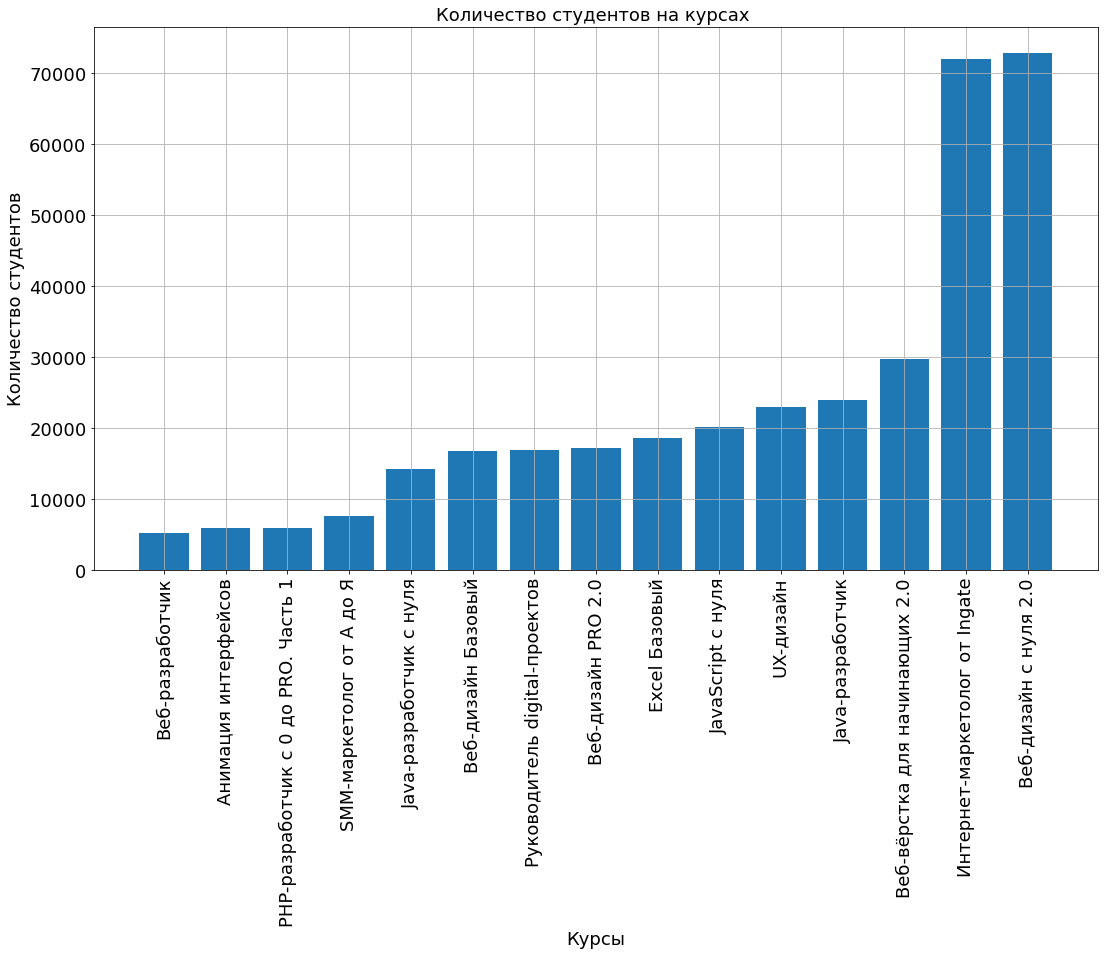

In [140]:
# построим barplot с количеством студентов на каждом курсе
plt.figure(figsize=(18, 10))
plot = plt.bar(stud_count['title'], stud_count['students_count'])
plt.xlabel('Курсы', fontsize=18)
plt.ylabel('Количество студентов', fontsize=18)
plt.tick_params(labelsize=18)
plt.title('Количество студентов на курсах ', fontsize=18)
plt.xticks( rotation = 90)
plt.grid()
plt.show()

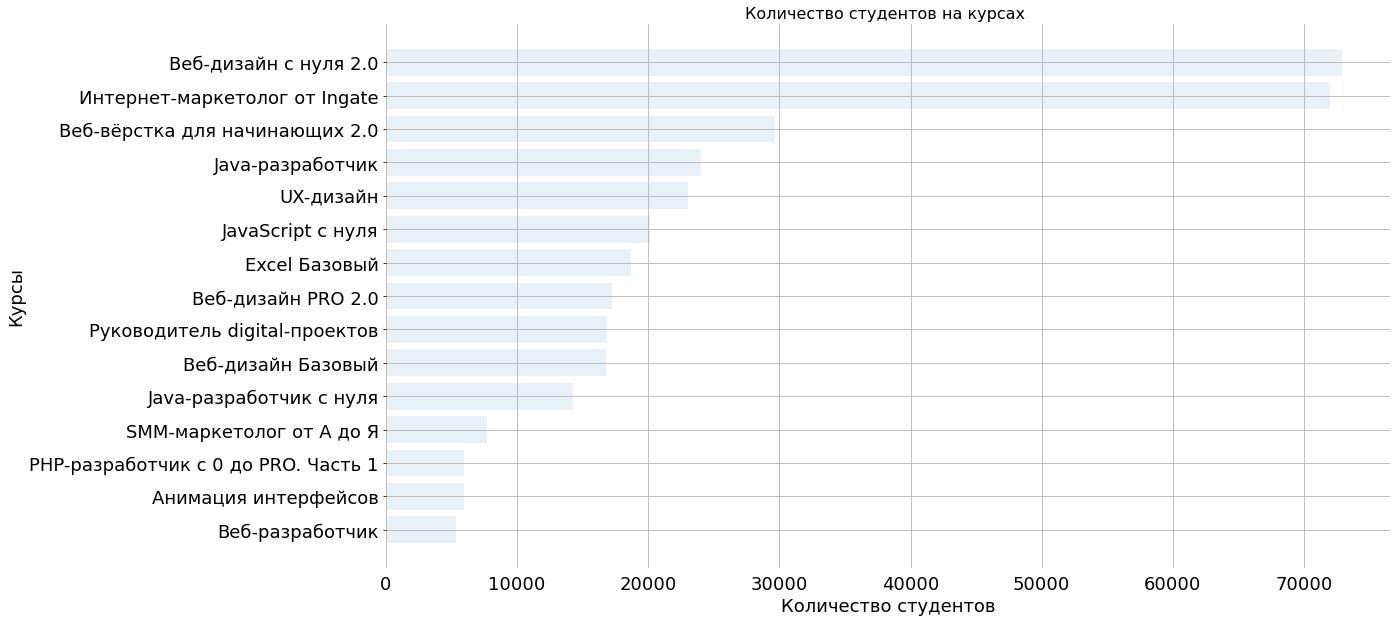

In [241]:
# построим горизонтальный barplot с количеством студентов на каждом курсе
plt.figure(figsize=(18, 10))
plot = plt.barh(stud_count['title'], stud_count['students_count'], alpha = 0.1)
plt.xlabel('Количество студентов', fontsize=18)
plt.ylabel('Курсы', fontsize=18)
plt.tick_params(labelsize=18)
plt.title('Количество студентов на курсах ', fontsize=16)
plt.grid()
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', bottom=False,
                top=False, labelbottom=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [20]:
data.head()

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,3.0,done,2018-02-19 19:21:25.013391+00,2018-02-20 08:46:02.029132+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True
1,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,2.0,done,2018-02-19 19:21:25.002537+00,2018-02-20 08:46:02.022666+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Пишем ТЗ. Годные шаблоны,c75f28a2-02fe-47ce-929d-6db242111831,True,False
2,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,1.0,done,2018-02-19 19:21:24.985811+00,2018-02-20 08:46:02.007429+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Аналитика в digital-проектах,96c8b66c-6bce-4d02-908f-7577dc2b32b3,True,False
3,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,1.0,1.0,done,2018-02-06 21:47:41+00,2018-02-06 14:32:40+00,Руководитель digital-проектов,Business,Экологичный путь менеджера,Карта компетенций менеджера,023d96d8-63ac-4d6f-974f-a15add3cdb34,True,False
4,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,cc5799c97826d79ac3ede2791daac00e,4.0,3.0,fail,2018-03-17 13:50:55.262335+00,NaN,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True


In [245]:
data['start_date'] = pd.to_datetime(data['start_date'])
data['finish_date'] = pd.to_datetime(data['finish_date'])

In [22]:
data.head()

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,3.0,done,2018-02-19 19:21:25.013391+00:00,2018-02-20 08:46:02.029132+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True
1,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,2.0,done,2018-02-19 19:21:25.002537+00:00,2018-02-20 08:46:02.022666+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Пишем ТЗ. Годные шаблоны,c75f28a2-02fe-47ce-929d-6db242111831,True,False
2,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,1.0,done,2018-02-19 19:21:24.985811+00:00,2018-02-20 08:46:02.007429+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Аналитика в digital-проектах,96c8b66c-6bce-4d02-908f-7577dc2b32b3,True,False
3,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,1.0,1.0,done,2018-02-06 21:47:41+00:00,2018-02-06 14:32:40+00,Руководитель digital-проектов,Business,Экологичный путь менеджера,Карта компетенций менеджера,023d96d8-63ac-4d6f-974f-a15add3cdb34,True,False
4,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,cc5799c97826d79ac3ede2791daac00e,4.0,3.0,fail,2018-03-17 13:50:55.262335+00:00,NaN,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True


In [243]:
# создадим в датасете новый столбец, содержащий месяц и год начала учебы
data['start_month'] = data['start_date'].dt.to_period('M')
None

In [282]:
# рассчитаем прирост студентов на каждом курсе за каждый месяц, взяв за
# начало учебы первый месяц, когда была начата домашняя работа
data_month_stud_inc = data\
        .groupby(['title', 'student_id'])['start_month']\
        .min()\
        .reset_index()\
        .groupby(['title', 'start_month'])['student_id']\
        .count()
data_month_stud_inc

title                          start_month
Excel Базовый                  2018-01         3
                               2018-02         7
                               2018-03         4
                               2018-05         7
                               2018-06        39
                                              ..
Руководитель digital-проектов  2019-03        35
                               2019-04        19
                               2019-05        23
                               2019-06        15
                               2019-07        24
Name: student_id, Length: 257, dtype: int64

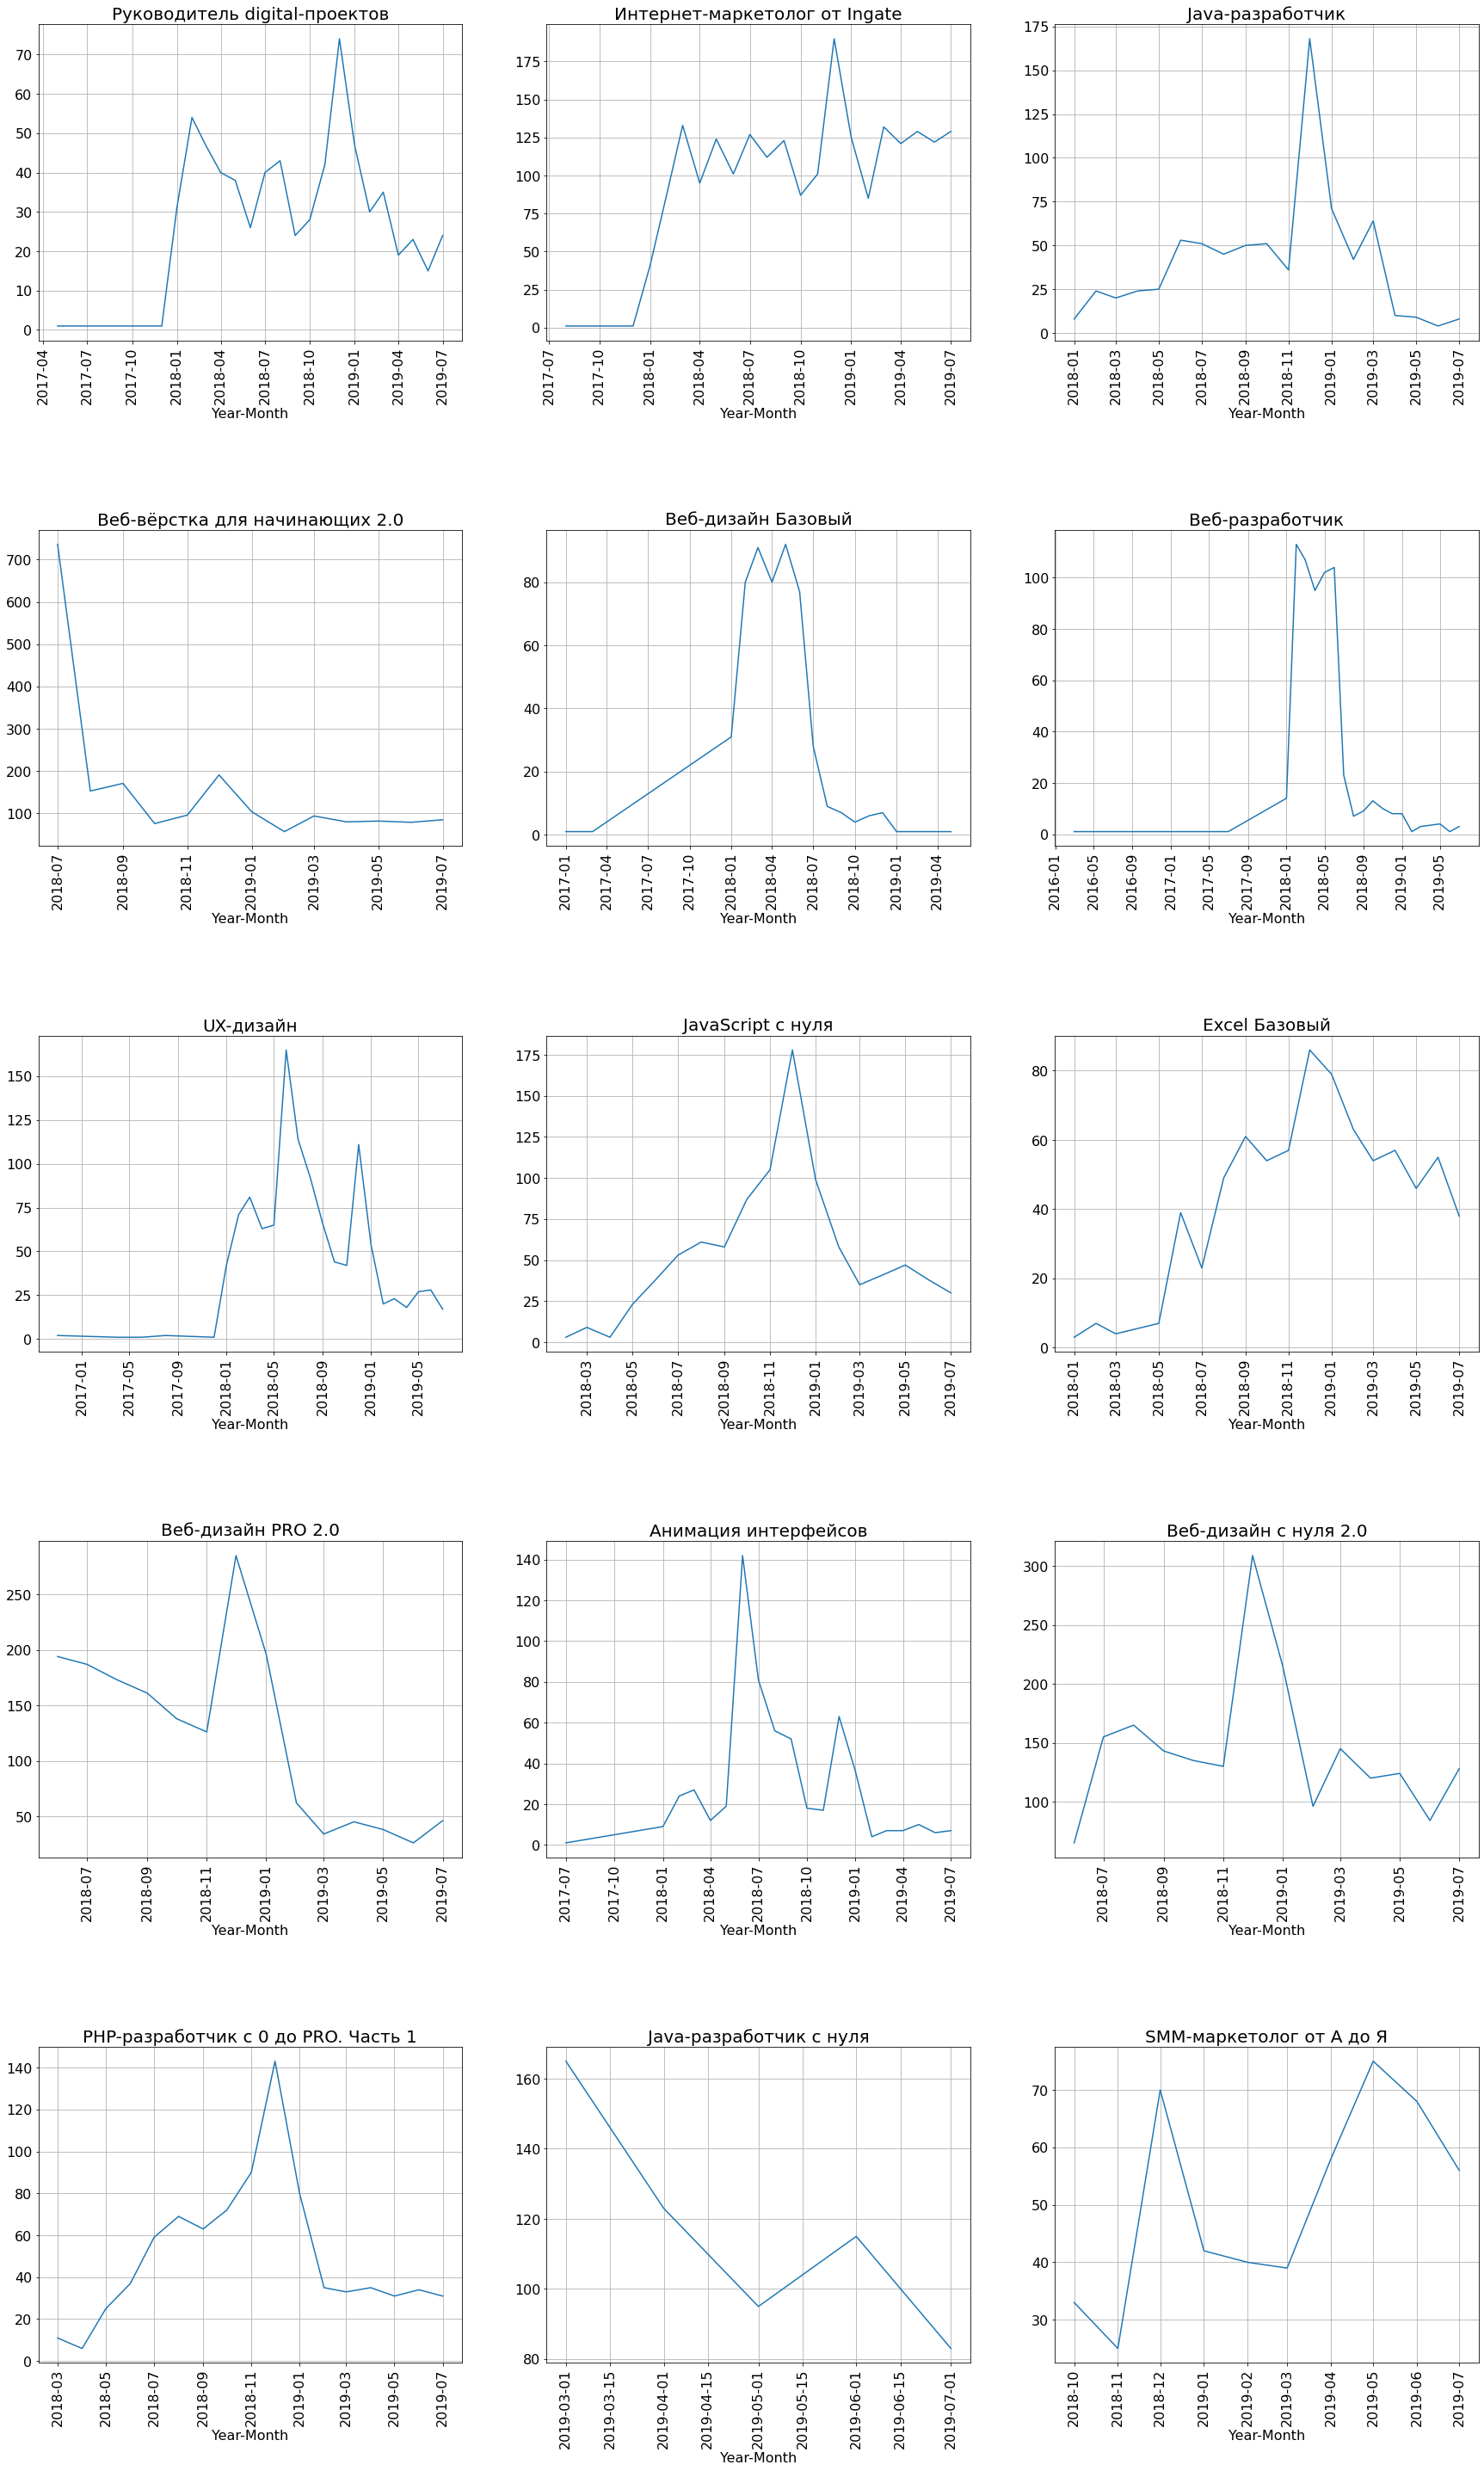

In [283]:
# построим графики прироста студентов по месяцам отдельно для каждого курса
f, ax = plt.subplots(5, 3, figsize=(30, 50))
for ax, title in zip(ax.ravel(), titles):
    sns.lineplot(x=data_month_stud_inc[title].index.astype('datetime64[D]'),
                 y=data_month_stud_inc[title].values, ax=ax)
    ax.grid()
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Year-Month', fontsize=16)
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=0.6)

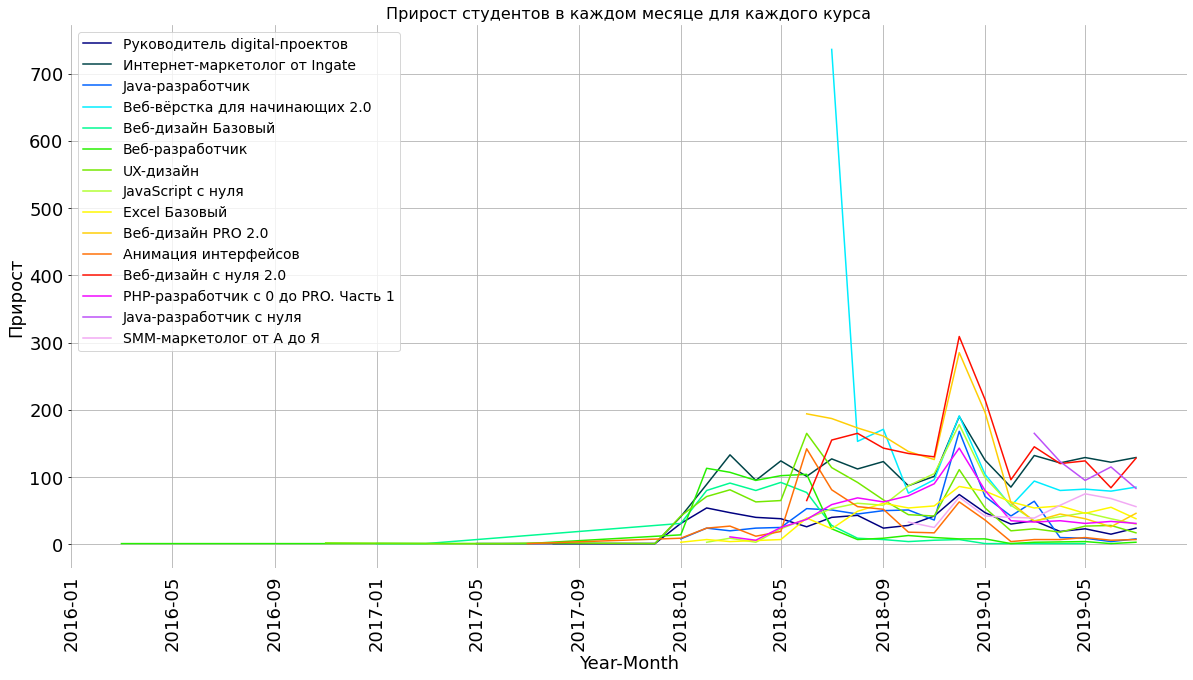

In [301]:
# построим графики прироста студентов по месяцам на одном plot
# для каждого курса

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmap_new = cm.get_cmap('gist_ncar', 16)
newcmp = ListedColormap(cmap_new(np.linspace(0, 1, 16)))
# cmap = cm.get_cmap('tab20b', 15)
plt.figure(figsize=(20, 10))
for ttl, clr in zip(titles, newcmp.colors):
    sns.lineplot(x=data_month_stud_inc[ttl].index.astype('datetime64[D]'),
                 y=data_month_stud_inc[ttl].values, label=ttl, color=clr)
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Прирост', fontsize=18)
plt.title("Прирост студентов в каждом месяце для каждого курса", fontsize=16)
plt.tick_params(labelsize=18)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', bottom=False,
                top=False, labelbottom=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [298]:
titles_new = np.delete(titles, 3)

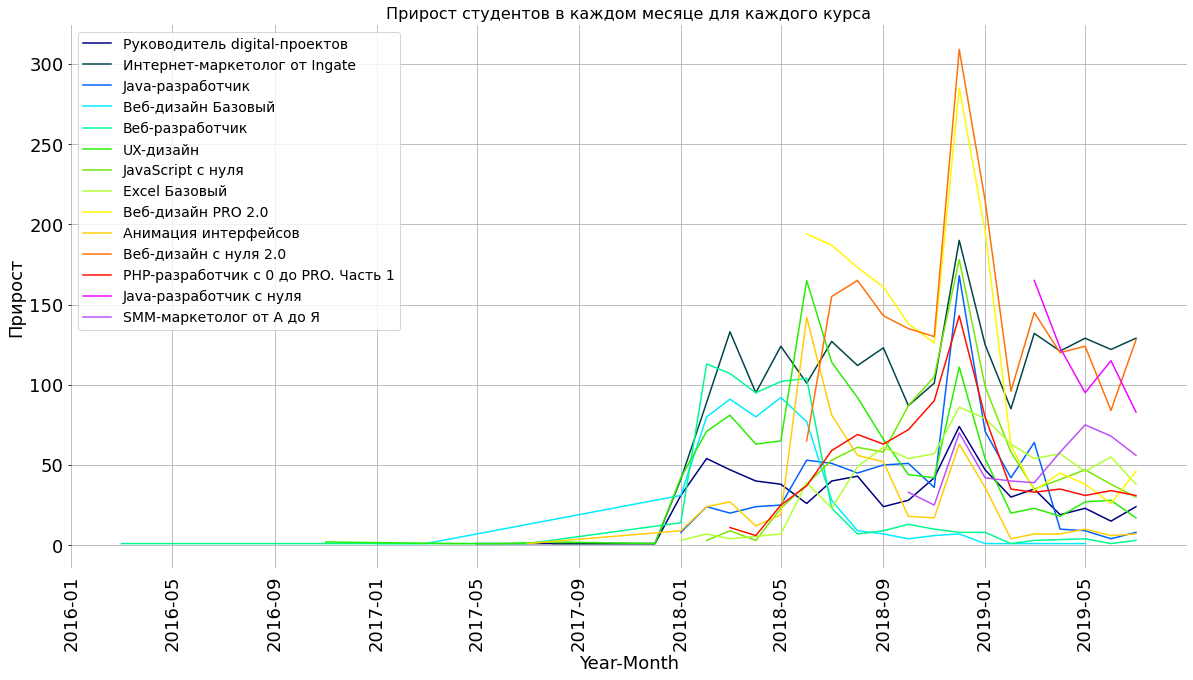

In [302]:
# построим аналогичный график, но без курса 
# веб-верстка для начинающих 2.0

# cmap = cm.get_cmap('tab20b', 15)
plt.figure(figsize=(20, 10))
for ttl, clr in zip(titles_new, newcmp.colors):
    sns.lineplot(x=data_month_stud_inc[ttl].index.astype('datetime64[D]'),
                 y=data_month_stud_inc[ttl].values, label=ttl, color=clr)
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Прирост', fontsize=18)
plt.title("Прирост студентов в каждом месяце для каждого курса", fontsize=16)
plt.tick_params(labelsize=18)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', bottom=False,
                top=False, labelbottom=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [248]:
# создадим в датасете новый столбец, содержащий месяц и год окончания 
# выполнения ДЗ
data['finish_month'] = data['finish_date'].dt.to_period('M')

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [257]:
# проведем подсчет количества прогрессов по ДЗ по курса за каждый месяц
data_month_progr = data[data['status'] == 'done'].\
    groupby(['title', 'finish_month'])['progress_id'].count()

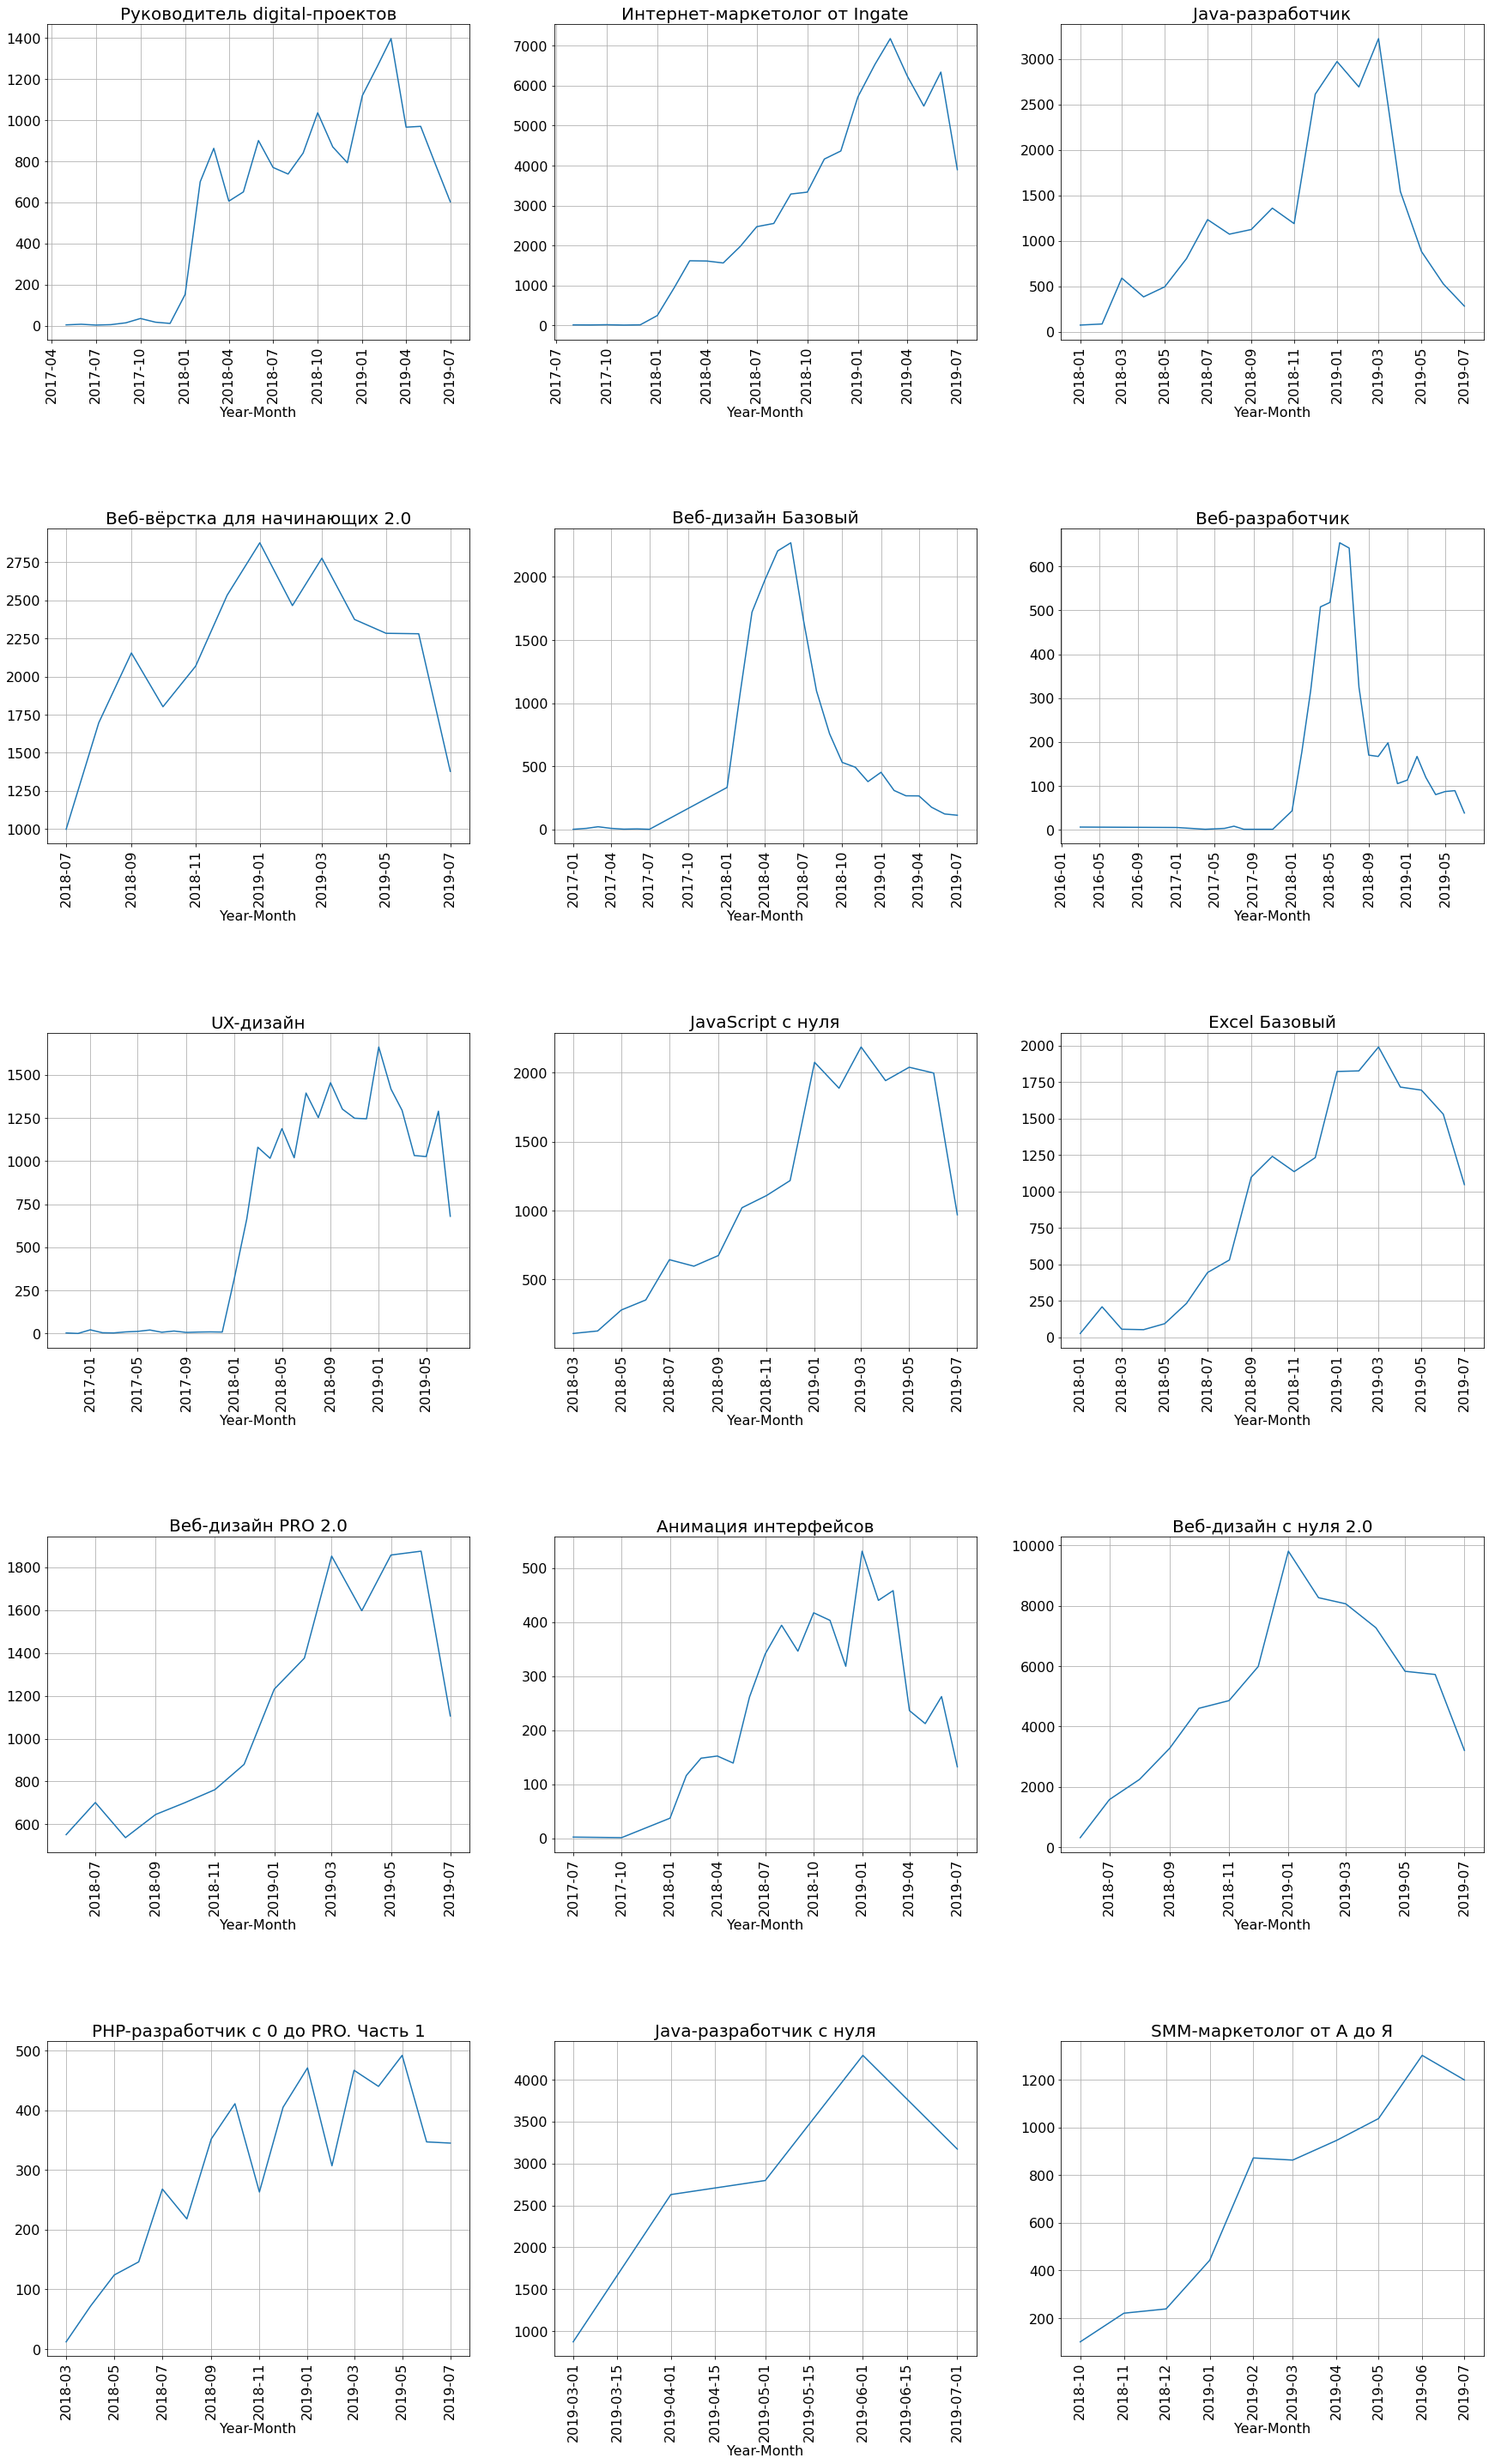

In [258]:
# построим графики корличества прогрессов по месяцам отдельно 
# для каждого курса

f, ax = plt.subplots(5, 3, figsize=(30, 50))
for ax, title in zip(ax.ravel(), titles):
    sns.lineplot(x=data_month_progr[title].index.astype('datetime64[D]'),
                 y=data_month_progr[title].values, ax=ax)
    ax.grid()
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Year-Month', fontsize=16)
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=0.6)

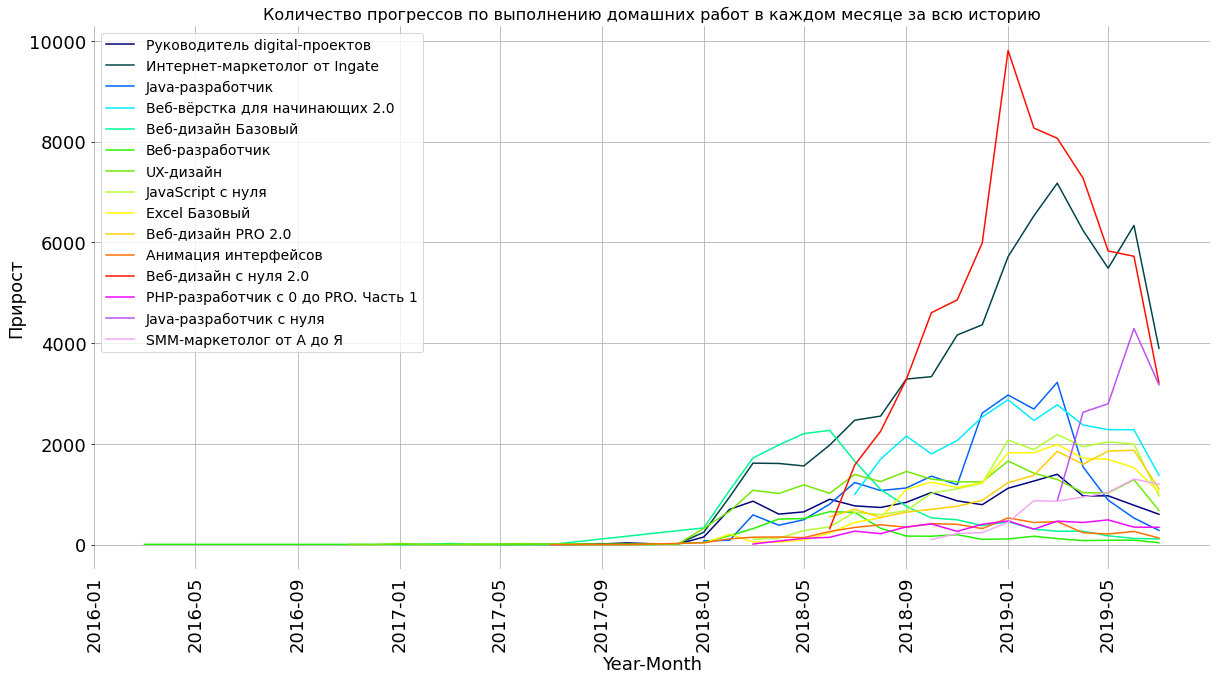

In [304]:
# построим общий график количества прогрессов для всех курсов по месяцам
plt.figure(figsize=(20, 10))
for ttl, clr in zip(titles, newcmp.colors):
    sns.lineplot(x=data_month_progr[ttl].index.astype('datetime64[D]'),
                 y=data_month_progr[ttl].values, label=ttl, color=clr)
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Прирост', fontsize=18)
plt.title("Количество прогрессов по выполнению домашних работ в \
каждом месяце за всю историю", fontsize=16)
plt.tick_params(labelsize=18)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', bottom=False,
                top=False, labelbottom=False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

По графику прироста студентов в зависимости от месяца видно, что заметный прирост по большинству курсов начинался в период от полугода до года с первого поступившего ученика.

Также видно, что скачки практически всех графиков приходятся на декабрь. Скорее всего это связано с акциями и скидками на курсы, связанные с новогодними распродажами. Наиболее популярными в предновогодний период являлись курсы Веб-дизайн PRO 2.0 и Веб-дизайн с нуля 2.0.

Аномально выглядит скачок в самом начале у курса Веб-верстка для начинающих 2.0. В первый месяц пришло более 700 учеников, а в дальнейшем количество почти все время падало. Данное значение выглядит ошибкой.


По графику количества прогрессов по выполнению домашних работ в каждом месяце за всю историю видно, что по большинству курсов количество возрастает.

Самые большие значения количества прогрессов приходятся на Веб-дизайн с нуля 2.0 и Руководитель диджитал проектов.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [307]:
data.head()

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month,finish_month
0,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,3.0,done,2018-02-19 19:21:25.013391+00:00,2018-02-20 08:46:02.029132+00:00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True,2018-02,2018-02
1,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,2.0,done,2018-02-19 19:21:25.002537+00:00,2018-02-20 08:46:02.022666+00:00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Пишем ТЗ. Годные шаблоны,c75f28a2-02fe-47ce-929d-6db242111831,True,False,2018-02,2018-02
2,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,1.0,done,2018-02-19 19:21:24.985811+00:00,2018-02-20 08:46:02.007429+00:00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Аналитика в digital-проектах,96c8b66c-6bce-4d02-908f-7577dc2b32b3,True,False,2018-02,2018-02
3,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,1.0,1.0,done,2018-02-06 21:47:41+00:00,2018-02-06 14:32:40+00:00,Руководитель digital-проектов,Business,Экологичный путь менеджера,Карта компетенций менеджера,023d96d8-63ac-4d6f-974f-a15add3cdb34,True,False,2018-02,2018-02
4,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,cc5799c97826d79ac3ede2791daac00e,4.0,3.0,fail,2018-03-17 13:50:55.262335+00:00,NaT,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True,2018-03,NaT


In [360]:
start_module = data.groupby(['title', 'module_title', 'student_id'])['start_date'].min().reset_index()
finish_module = data.groupby(['title', 'module_title', 'student_id'])['finish_date'].max().reset_index()
data_modules = start_module.merge(finish_module, on=(['student_id', 'title', 'module_title']))
data_modules['days_to_finish'] = round((data_modules['finish_date'] - data_modules['start_date'])/ np.timedelta64(1, 'D'),3)

In [361]:
data_modules[]

,title,module_title,student_id,start_date,finish_date,days_to_finish
0,Excel Базовый,Визуализация данных Excel,006f0189ec657741ee4d53474c7a258d,2019-03-06 10:21:41.018941+00:00,2019-03-10 23:47:06.527886+00:00,4.559
1,Excel Базовый,Визуализация данных Excel,0098ca12f73a56dadbf6099389305d80,2019-05-08 12:52:39.110074+00:00,2019-05-31 07:45:10.160354+00:00,22.786
2,Excel Базовый,Визуализация данных Excel,02d99847edc5c3a4441c844dcbdcd0aa,2019-02-09 17:28:50.015459+00:00,2019-02-09 17:29:10.279353+00:00,0.000
3,Excel Базовый,Визуализация данных Excel,032a2d4a37481ddc6844bd22c47d72c6,2018-11-22 16:27:36.171960+00:00,2018-11-22 17:57:14.742912+00:00,0.062
4,Excel Базовый,Визуализация данных Excel,03ce810dd7f993c5eb0c4acc5098df35,2019-04-09 18:59:08.347895+00:00,2019-04-16 05:16:33.055436+00:00,6.429
...,...,...,...,...,...,...
68466,Руководитель digital-проектов,Экологичный путь менеджера,fd3a3ed82b4e1ea88680494282c4d7ca,2018-12-28 09:01:14.583695+00:00,2019-01-11 06:28:23.061026+00:00,13.894
68467,Руководитель digital-проектов,Экологичный путь менеджера,fde85e2be0df5bd3a136489033593677,2018-12-17 12:46:09.218372+00:00,2018-12-23 13:43:12.503103+00:00,6.040
68468,Руководитель digital-проектов,Экологичный путь менеджера,ff0f96efc5bc705cd50cda0baa15a879,2018-02-20 07:31:56.627353+00:00,2019-05-31 04:50:08.345936+00:00,464.888
68469,Руководитель digital-проектов,Экологичный путь менеджера,ff5e8cdf1578fda9a8128520c3c215bb,2018-03-27 13:00:28.158168+00:00,2019-06-18 16:30:57.501373+00:00,448.146


In [367]:
data_modules.groupby(['title', 'module_title'])['days_to_finish'].agg((min, max, np.mean, np.median))

min  \
title                         module_title                                                
Excel Базовый                  Визуализация данных Excel                          0.000   
                              Основной функционал Excel                           0.000   
                              Основной функционал Excel (продолжение)             0.000   
                              Сводные таблицы Excel                               0.000   
                              Формулы и функции Excel. Более сложные формулы      0.000   
...                                                                                 ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   0.000   
                              Требовательность digital-продюсера                  0.000   
                              Управление временем                                 0.000   
                              Управление дизайнерами. Разработка дизайна по s...  0.000   
                              Экологичный путь менеджера                         -0.302   

                                                                                      max  \
title                         module_title                                                  
Excel Базовый                  Визуализация данных Excel                          179.829   
                              Основной функционал Excel                           390.205   
                              Основной функционал Excel (продолжение)             274.162   
                              Сводные таблицы Excel                               269.271   
                              Формулы и функции Excel. Более сложные формулы      294.121   
...                                                                                   ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   215.772   
                              Требовательность digital-продюсера                  397.307   
                              Управление временем                                 256.762   
                              Управление дизайнерами. Разработка дизайна по s...  199.597   
                              Экологичный путь менеджера                          464.888   

                                                                                       mean  \
title                         module_title                                                    
Excel Базовый                  Визуализация данных Excel                          13.304150   
                              Основной функционал Excel                           28.344018   
                              Основной функционал Excel (продолжение)             12.378234   
                              Сводные таблицы Excel                               14.355336   
                              Формулы и функции Excel. Более сложные формулы      15.270457   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   27.522584   
                              Требовательность digital-продюсера                  30.269804   
                              Управление временем                                 22.369914   
                              Управление дизайнерами. Разработка дизайна по s...  21.511821   
                              Экологичный путь менеджера                          22.947941   

                                                                                   median  
title                         module_title                                                 
Excel Базовый                  Визуализация данных Excel                           6.6920  
                              Основной функционал Excel                            8.7880  
                              Основной функционал Excel (продолжение)              4.3

In [370]:
data_modules_median = data_modules.groupby(['title', 'module_title'])['days_to_finish'].agg(np.median)
data_modules_median

title                          module_title                                       
Excel Базовый                   Визуализация данных Excel                              6.6920
                               Основной функционал Excel                               8.7880
                               Основной функционал Excel (продолжение)                 4.3180
                               Сводные таблицы Excel                                   6.1920
                               Формулы и функции Excel. Более сложные формулы          5.7290
                                                                                       ...   
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                      12.3390
                               Требовательность digital-продюсера                     14.3470
                               Управление временем                                     9.4970
                               Управление дизайнерами. Разработка дизай

In [388]:
# построим графики корличества прогрессов по месяцам отдельно 
# для каждого курса

f, ax = plt.subplots(15, 1, figsize=(20, 400))
for ax, title in zip(ax.ravel(), titles):
    sns.barplot(y=data_modules_median[title].index,
                 x=data_modules_median[title].values, ax=ax)
    ax.grid()
    ax.set_title(title, fontsize=24)
    ax.tick_params(labelsize=24)
    ax.set_xlabel('Days', fontsize=24)
    ax.set_ylabel('Modules', fontsize=24)
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=0.1)

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


